<a href="https://colab.research.google.com/github/Cumberkid/Learning-the-Optimal-Solution-Path/blob/main/TestConvergencePytorchNumpyVsSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test Convergence for PyTorch

## Import the necessary libraries

In [ ]:
import numpy as np
import torch
# from torch import nn
# from torch.utils.data import Dataset, DataLoader  #for creating the dataset


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Experiments')

In [ ]:
# Our own module
import my_logit

import importlib
importlib.reload(my_logit)

<module 'my_logit' from '/content/drive/MyDrive/Experiments/my_logit.py'>

## Dataset
We use the Wisconsin breast cancer dataset and then port it over an object of the Pytorch dataset class so it can be read by data_loader.

Description of the breast cancer Wisconsin dataset (classification): https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
# load breast cancer data
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
import pandas as pd

df = pd.DataFrame(X).describe()

df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
clf = LogisticRegression(solver='lbfgs', max_iter=100).fit(X[:100,:], y[:100])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.predict(X[:100,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
# preprocess data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
df = pd.DataFrame(X).describe()

df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


##Test Model Convergence


###Test convergence on 100 synthetic datapoints generated with 2-d standard normal distribution.

In [ ]:
#some synthetic data for instance below
np.random.seed(8675309)
torch.manual_seed(8675309) #Ensures linear layer initializes deterministically for reproducibility

X_syn, y_syn = my_logit.gen_data(100, 100, 2)

# beta_star = torch.from_numpy(beta_star) #useful to store as tensor for later

In [ ]:
#The pytorch built-in binary cross-entropy loss
criterion = torch.nn.BCELoss()

input_dim_syn = X_syn.shape[1]

In [ ]:
# normalize
syn_data = my_logit.Regression_Data(X_syn, y_syn)
# batch_size = 32
syn_data_loader = my_logit.DataLoader(syn_data, batch_size=len(syn_data), shuffle=False, )

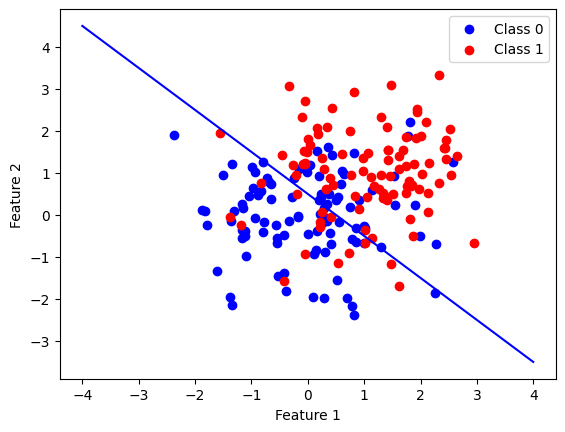

In [ ]:
# Separate data points by class
class_0 = X_syn[y_syn == 0]
class_1 = X_syn[y_syn == 1]

# Create a scatter plot
plt.scatter(class_0[:, 0], class_0[:, 1], c='b', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='r', marker='o', label='Class 1')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

# plot perfect separator
x_1 = np.linspace(-4, 4, 100)
x_2 = -x_1 + .5
plt.plot(x_1, x_2, color='blue')

# Show the plot
plt.show()

#### Test Torch, Numpy, and Sklearn logistic loss at convergence with $\lambda \in (0,1)$.

In [ ]:
lam = 0.75
input_dim_syn = X_syn.shape[1]
num_iterations = 1000
learning_rate = 0.5**7

Torch convergence on synthetic data:

In [ ]:
# lam = 0.99999
init_weight = torch.zeros(input_dim_syn)
# build the model
model = my_logit.Logistic_Regression(input_dim_syn, 1, lam, init_weight).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# print(model.beta())
for t in range(num_iterations):
        my_logit.train(syn_data_loader, model, criterion, optimizer, trace_frequency=5)

print(model.linear.bias, model.linear.weight)

Parameter containing:
tensor([-0.0056], requires_grad=True) Parameter containing:
tensor([[0.0759, 0.0715]], requires_grad=True)


In [ ]:
torch_soln, torch_pred = my_logit.logit_by_hand(model.linear.weight.T,
                                                model.linear.bias.data,
                                                lam,
                                                torch.tensor(X_syn, dtype=torch.float32),
                                                torch.tensor(y_syn, dtype=torch.float32))
torch_soln_test = my_logit.test(syn_data_loader, model, criterion, lam)
print(f"torch loss convex = {torch_soln}")
# print(torch_soln_test)

torch loss convex = 0.16851484775543213


In [ ]:
pred = model(torch.tensor(X_syn, dtype=torch.float32))

In [ ]:
np.allclose(torch_pred.detach().numpy(), pred.detach().numpy())

True

Numpy convergence on synthetic data:

In [ ]:
# lam = 0.99999
weights = np.zeros(input_dim_syn)
weights = my_logit.gradient_descent(X_syn, y_syn, weights, lam, learning_rate, num_iterations)


numpy_soln, numpy_pred = my_logit.logit_by_hand(torch.tensor(weights.reshape(-1,1), dtype=torch.float32),
                                                lam,
                                                torch.tensor(X_syn, dtype=torch.float32),
                                                torch.tensor(y_syn, dtype=torch.float32))
# numpy_pred = predict(X_train, weights)
# numpy_soln = compute_cost(X_train, y_train, weights, lam)
print(f"numpy loss convex = {numpy_soln}")

print(weights)

numpy loss convex = 0.3244011700153351
[0.17709101 0.1661145 ]


Sklearn solution on synthetic data:

In [ ]:
# lam = 0.99999
n = X_syn.shape[0]
clf = LogisticRegression(penalty="l2", tol= 1e-4, C=(1-lam)/(n*lam),
                         fit_intercept=True, solver='liblinear', max_iter=num_iterations, verbose=1)
clf.coef_ = np.zeros(input_dim_syn)
clf.intercept_ = 0
print(clf.intercept_, clf.coef_)
clf.fit(X_syn, y_syn)
# pred = torch.tensor(clf.predict_proba(X_syn)[:, 1], dtype=torch.float32)
# print(pred.T)

clf_soln, clf_pred = my_logit.logit_by_hand(torch.tensor(clf.coef_.T, dtype=torch.float32),
                                            torch.tensor(clf.intercept_, dtype=torch.float32),
                                            lam,
                                            torch.tensor(X_syn, dtype=torch.float32),
                                            torch.tensor(y_syn, dtype=torch.float32))
print(f"sklearn loss convex = {clf_soln}")
print(clf.intercept_, clf.coef_)

0 [0. 0.]
[LibLinear]sklearn loss convex = 0.16851484775543213
[-0.00565346] [[0.07598943 0.07160218]]


In [ ]:
pred = torch.tensor(clf.predict_proba(X_syn)[:, 1], dtype=torch.float32)

In [ ]:
np.allclose(torch.squeeze(clf_pred).detach().numpy(), pred.detach().numpy())

True

### Test convergence on the breast cancer dataset.

In [ ]:
#The pytorch built-in binary cross-entropy loss
criterion = torch.nn.BCELoss()
input_dim = X.shape[1]

In [ ]:
samples = 200

In [ ]:
np.random.seed(8675309)
torch.manual_seed(8675309)
perturb = np.random.multivariate_normal(
             np.zeros(input_dim),
             np.eye(input_dim),
             samples
             )

In [ ]:
X_train = X[200-samples:200]
# X_train += perturb
y_train = y[200-samples:200]
train_data = my_logit.Regression_Data(X_train, y_train)
train_data_loader = my_logit.DataLoader(train_data, batch_size=len(train_data), shuffle=False, )

In [ ]:
# X_test = X[500-samples:500]
# y_test = y[500-samples:500]
X_test = X_train
y_test = y_train
test_data = my_logit.Regression_Data(X_test, y_test)
test_data_loader = my_logit.DataLoader(test_data, batch_size=len(test_data), shuffle=False, )

In [ ]:
from numpy import linalg
print(linalg.cond(X_train, p=2))

344.3415415372177


#### Test Torch, Numpy, and Sklearn logistic loss at convergence with $\lambda \in (0,1)$.

In [ ]:
lam = 0.5
num_iterations = 2000
learning_rate = 0.5**7

Torch:

In [ ]:
# build the model
init_weight = torch.zeros(input_dim)
model = my_logit.Logistic_Regression(input_dim, 1, lam, init_weight).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(num_iterations):
        my_logit.train(train_data_loader, model, criterion, optimizer, trace_frequency=5)

torch_soln, torch_pred = my_logit.logit_by_hand(model.linear.weight.T, lam, torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
print(f"torch loss convex = {torch_soln}")

torch loss convex = 0.20498131215572357


In [ ]:
print(accuracy_score(y_test, torch_pred.detach().numpy()))

0.95


Numpy:

In [ ]:
# lam = 0.5
weights = np.zeros(input_dim)
weights = my_logit.gradient_descent(X_train, y_train, weights, lam, learning_rate, num_iterations)


numpy_soln, numpy_pred = my_logit.logit_by_hand(torch.tensor(weights.reshape(-1,1), dtype=torch.float32), lam, torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
print(f"numpy loss convex = {numpy_soln}")
# print(weights)

numpy loss convex = 0.20498132705688477


In [ ]:
print(accuracy_score(y_test, numpy_pred))

0.95


In [ ]:
# lam = 0.5
n = X_train.shape[0]
clf = LogisticRegression(penalty="l2", tol= 1e-4, C=(1-lam)/(n*lam), fit_intercept=False, solver='newton-cholesky', max_iter=num_iterations, verbose=1)
clf.coef_ = np.zeros(input_dim)
clf.fit(X_train, y_train)
# pred = torch.tensor(clf.predict_proba(X_syn)[:, 1], dtype=torch.float32)
# print(pred.T)

clf_logit_loss = my_logit.logit_by_hand(torch.tensor(clf.coef_.T, dtype=torch.float32), 0, torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
print(f"sklearn loss = {(1-lam)/lam*clf_logit_loss[0] + 0.5*torch.tensor(clf.coef_).norm(p=2)**2}")
clf_soln, clf_pred = my_logit.logit_by_hand(torch.tensor(clf.coef_.T, dtype=torch.float32), lam, torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))
print(f"sklearn loss convex = {clf_soln}")
# print(clf.coef_)

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06621105563825525 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.0051447151419252435 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 3.723516756909406e-05 <= 0.0001
    2. Newton decrement 8.176025956420417e-05 <= 0.0001
  Solver did converge at loss = 0.4099626363754423.
sklearn loss = 0.4099626265275566
sklearn loss convex = 0.20498131215572357


In [ ]:
# clf_pred = clf.predict(X_test)
print(accuracy_score(y_test, clf_pred))

1.0


In [ ]:
torch_pred.detach().numpy().reshape(-1)

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [ ]:
clf_pred.T

tensor([[0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
         1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
         1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
         0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
         1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
         0., 0.]])

In [ ]:
numpy_pred.T

tensor([[0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
         1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
         0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
         0., 0.]])

In [ ]:
np.allclose(clf_pred.T,torch_pred.detach().numpy().reshape(-1))

False

In [ ]:
np.allclose(clf_pred.T,numpy_pred.T)

False

In [ ]:
np.allclose(numpy_pred.T,torch_pred.detach().numpy().reshape(-1))

True